<a href="https://colab.research.google.com/github/joni901/One_Modelagem-de-dados/blob/main/Modelagem%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# @title Texto de título padrão
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento

In [4]:
import pandas as pd

# URLs dos dados das lojas
urls = {
    'loja_1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'loja_2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'loja_3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'loja_4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Dicionário para armazenar o faturamento por loja
faturamentos = {}

for nome_loja, url in urls.items():
    df = pd.read_csv(url)

    # Converte para número e trata dados ausentes
    df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')
    df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
    df.dropna(subset=['Preço', 'Frete'], inplace=True)

    # Calcula faturamento (Preço + Frete)
    faturamento = (df['Preço'] + df['Frete']).sum()
    faturamentos[nome_loja] = faturamento

# Exibe o faturamento de cada loja
for loja, valor in faturamentos.items():
    print(f"{loja}: R$ {valor:,.2f}")


loja_1: R$ 1,616,347.09
loja_2: R$ 1,567,773.22
loja_3: R$ 1,542,047.69
loja_4: R$ 1,458,253.46


# 2. Vendas por Categoria

In [6]:
vendas_categoria_por_loja = {}

for nome_loja, url in urls.items():
    df = pd.read_csv(url)

    # Garante que os campos numéricos estejam corretos
    df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')
    df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
    df.dropna(subset=['Preço', 'Frete', 'Categoria do Produto'], inplace=True)

    # Cria nova coluna com valor total da venda
    df['Valor Total'] = df['Preço'] + df['Frete']

    # Agrupa por categoria e soma o valor total
    vendas_categoria = df.groupby('Categoria do Produto')['Valor Total'].sum().sort_values(ascending=False)

    # Salva o resultado
    vendas_categoria_por_loja[nome_loja] = vendas_categoria

# Exibe os resultados
for loja, categorias in vendas_categoria_por_loja.items():
    print(f"\n📊 {loja.upper()} - Vendas por Categoria:")
    print(categorias.apply(lambda x: f"R$ {x:,.2f}"))



📊 LOJA_1 - Vendas por Categoria:
Categoria do Produto
eletronicos              R$ 603,278.24
eletrodomesticos         R$ 510,678.32
moveis                   R$ 263,505.32
instrumentos musicais    R$ 128,243.50
esporte e lazer           R$ 55,216.66
brinquedos                R$ 25,299.27
utilidades domesticas     R$ 17,789.38
livros                    R$ 12,336.41
Name: Valor Total, dtype: object

📊 LOJA_2 - Vendas por Categoria:
Categoria do Produto
eletronicos              R$ 576,858.27
eletrodomesticos         R$ 489,499.13
moveis                   R$ 247,817.05
instrumentos musicais    R$ 147,397.09
esporte e lazer           R$ 48,828.90
brinquedos                R$ 22,445.83
utilidades domesticas     R$ 20,731.11
livros                    R$ 14,195.84
Name: Valor Total, dtype: object

📊 LOJA_3 - Vendas por Categoria:
Categoria do Produto
eletronicos              R$ 576,840.39
eletrodomesticos         R$ 462,310.46
moveis                   R$ 282,475.23
instrumentos musicais    R$ 

# 3. Média de Avaliação das Lojas

In [8]:
# Dicionário para armazenar as médias
avaliacoes_medias = {}

for nome_loja, url in urls.items():
    df = pd.read_csv(url)

    # Converte a avaliação para numérico e remove valores inválidos
    df['Avaliação da compra'] = pd.to_numeric(df['Avaliação da compra'], errors='coerce')
    df = df.dropna(subset=['Avaliação da compra'])

    # Calcula média
    media = df['Avaliação da compra'].mean()
    avaliacoes_medias[nome_loja] = media

# Exibe resultados
print("📈 Média de Avaliação por Loja:\n")
for loja, media in avaliacoes_medias.items():
    print(f"{loja}: {media:.2f} estrelas")


📈 Média de Avaliação por Loja:

loja_1: 3.98 estrelas
loja_2: 4.04 estrelas
loja_3: 4.05 estrelas
loja_4: 4.00 estrelas


# 4. Produtos Mais e Menos Vendidos

In [15]:
top5_produtos_por_loja = {}
bottom5_produtos_por_loja = {}

for nome_loja, url in urls.items():
    df = pd.read_csv(url)

    contagem = df['Produto'].value_counts()

    top5_produtos_por_loja[nome_loja] = contagem.head(5)
    bottom5_produtos_por_loja[nome_loja] = contagem.tail(5)  # os 5 menos vendidos

    print(f"\n📦 {nome_loja.upper()}")
    print(f"🔝 Produto mais vendido: {contagem.idxmax()} ({contagem.max()} vendas)")
    print(f"🔻 Produto menos vendido: {contagem.idxmin()} ({contagem.min()} venda{'s' if contagem.min() > 1 else ''})")



📦 LOJA_1
🔝 Produto mais vendido: Micro-ondas (60 vendas)
🔻 Produto menos vendido: Headset (33 vendas)

📦 LOJA_2
🔝 Produto mais vendido: Iniciando em programação (65 vendas)
🔻 Produto menos vendido: Jogo de tabuleiro (32 vendas)

📦 LOJA_3
🔝 Produto mais vendido: Kit banquetas (57 vendas)
🔻 Produto menos vendido: Blocos de montar (35 vendas)

📦 LOJA_4
🔝 Produto mais vendido: Cama box (62 vendas)
🔻 Produto menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja

In [16]:
frete_por_loja = {}

for nome_loja, url in urls.items():
    df = pd.read_csv(url)

    # Converte o frete para número e ignora valores nulos
    df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
    df.dropna(subset=['Frete'], inplace=True)

    # Soma total de frete
    frete_total = df['Frete'].sum()
    frete_por_loja[nome_loja] = frete_total

# Exibe resultados
print("🚚 Total de Frete por Loja:\n")
for loja, frete in frete_por_loja.items():
    print(f"{loja}: R$ {frete:,.2f}")


🚚 Total de Frete por Loja:

loja_1: R$ 81,837.97
loja_2: R$ 79,314.16
loja_3: R$ 78,022.66
loja_4: R$ 73,755.88


# 6. Gerando Graficos

/tmp/ipython-input-18-3583268775.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(faturamentos.keys()), y=list(faturamentos.values()), palette='Blues_d')


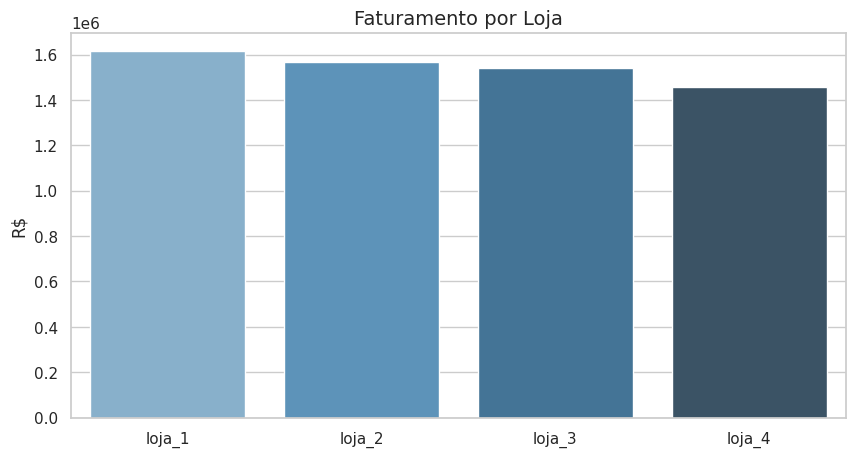

/tmp/ipython-input-18-3583268775.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frete_por_loja.keys()), y=list(frete_por_loja.values()), palette='Greens_d')


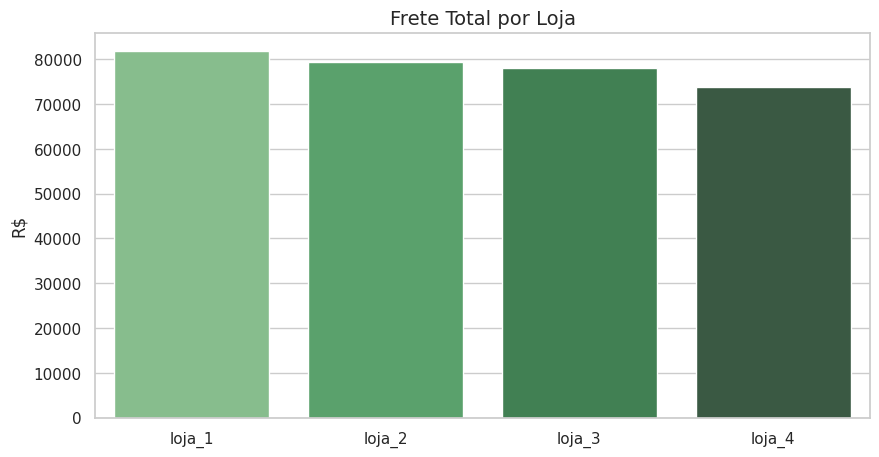

/tmp/ipython-input-18-3583268775.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avaliacoes_medias.keys()), y=list(avaliacoes_medias.values()), palette='Purples_d')


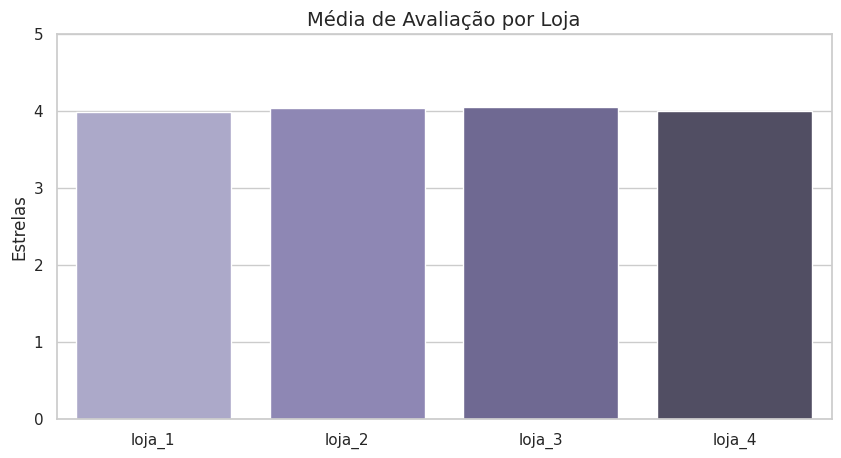

/tmp/ipython-input-18-3583268775.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='Oranges_r')


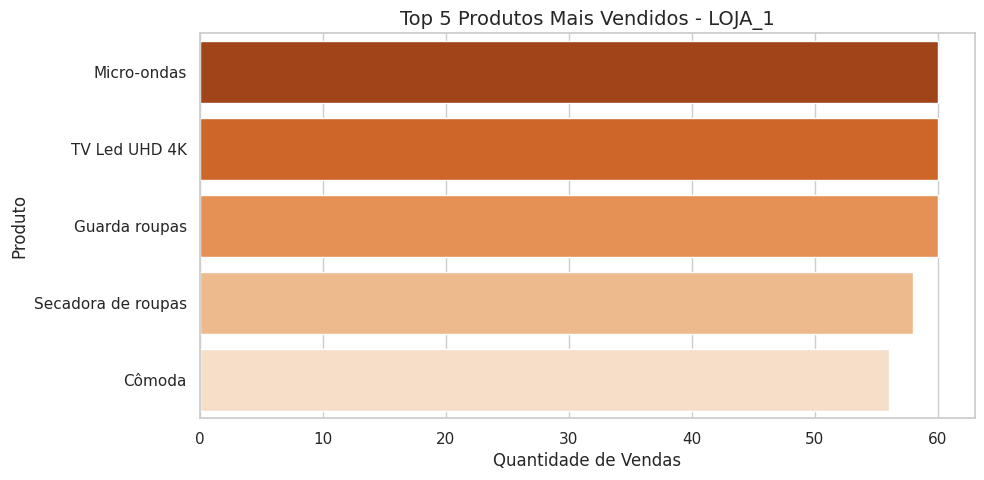

/tmp/ipython-input-18-3583268775.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='Oranges_r')


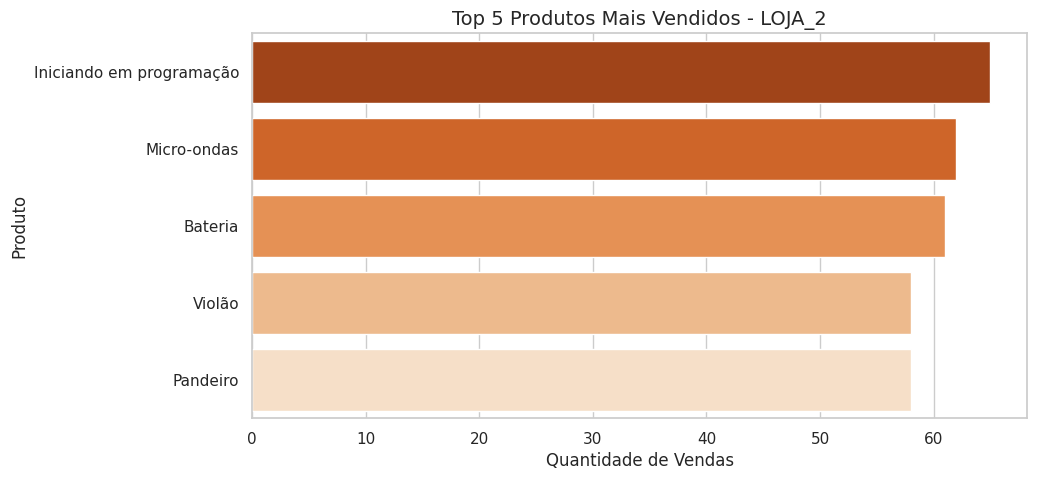

/tmp/ipython-input-18-3583268775.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='Oranges_r')


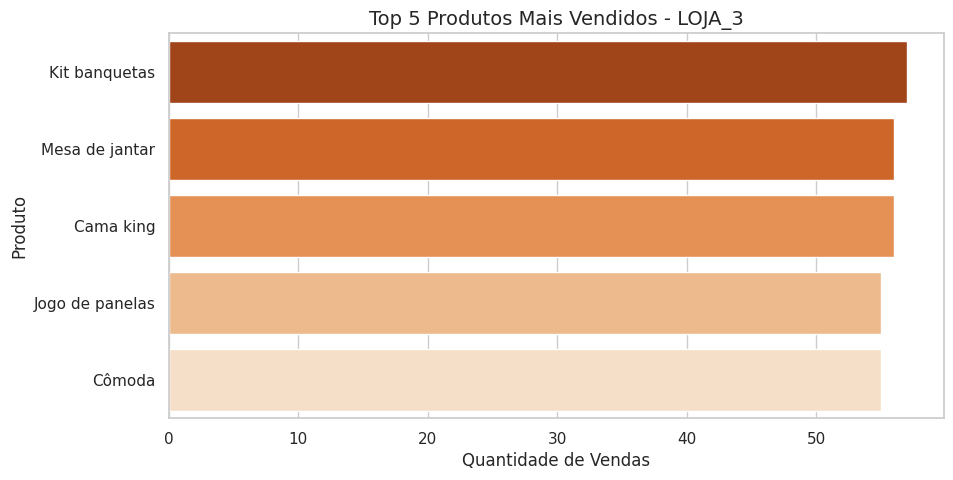

/tmp/ipython-input-18-3583268775.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='Oranges_r')


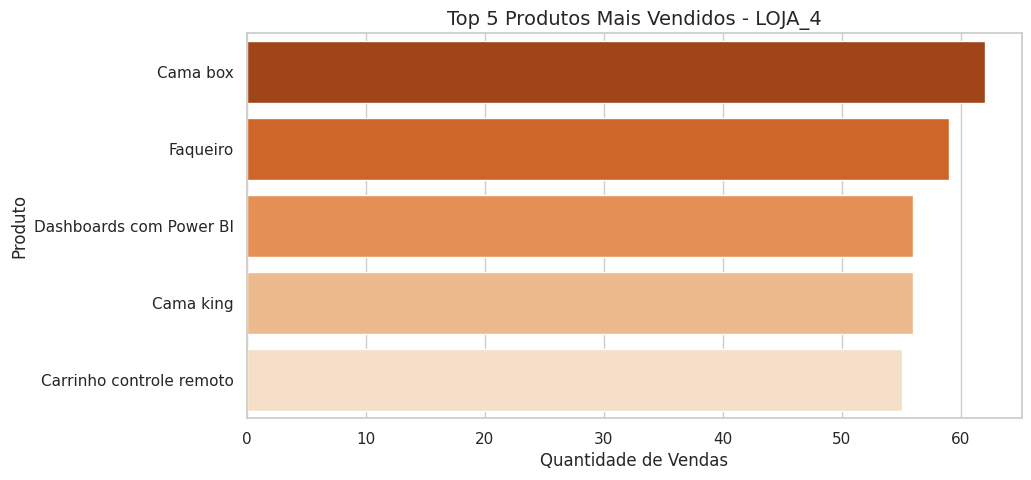

/tmp/ipython-input-18-3583268775.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_produtos.values, y=bottom_produtos.index, palette='Blues_r')


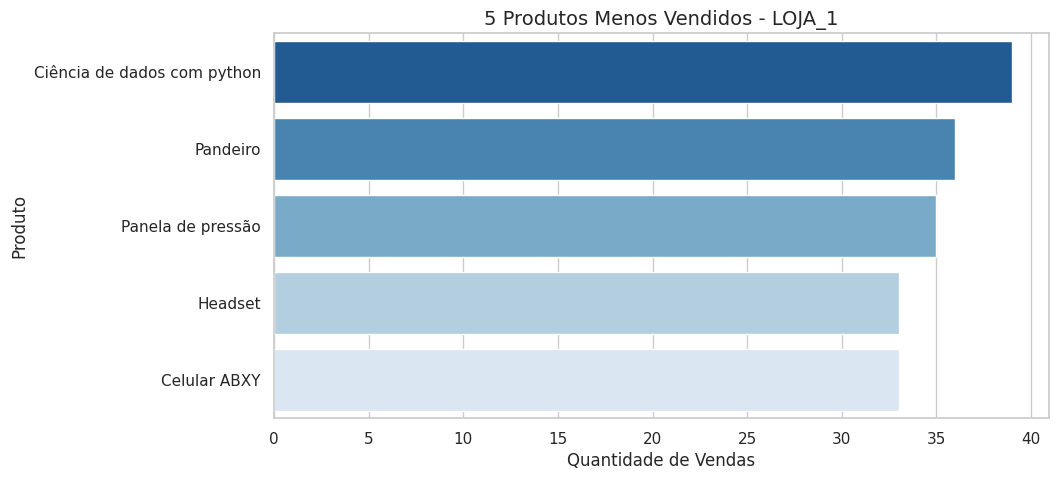

/tmp/ipython-input-18-3583268775.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_produtos.values, y=bottom_produtos.index, palette='Blues_r')


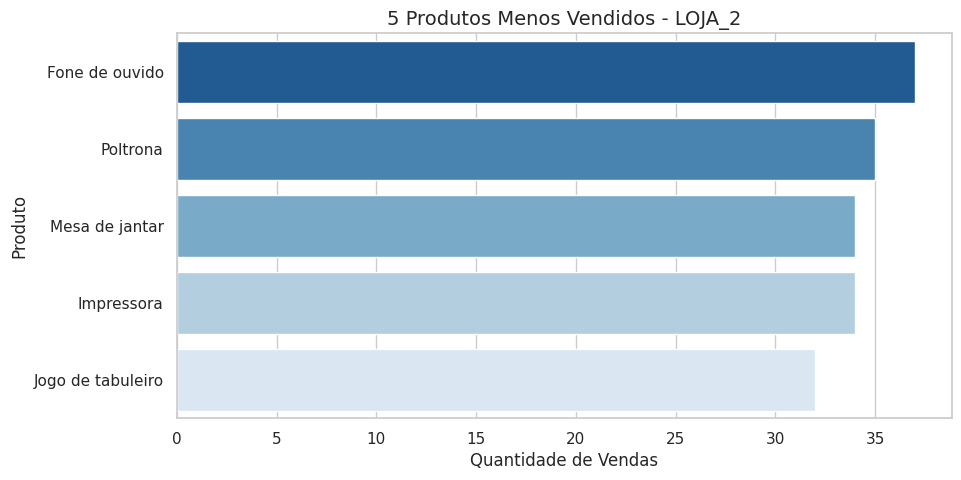

/tmp/ipython-input-18-3583268775.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_produtos.values, y=bottom_produtos.index, palette='Blues_r')


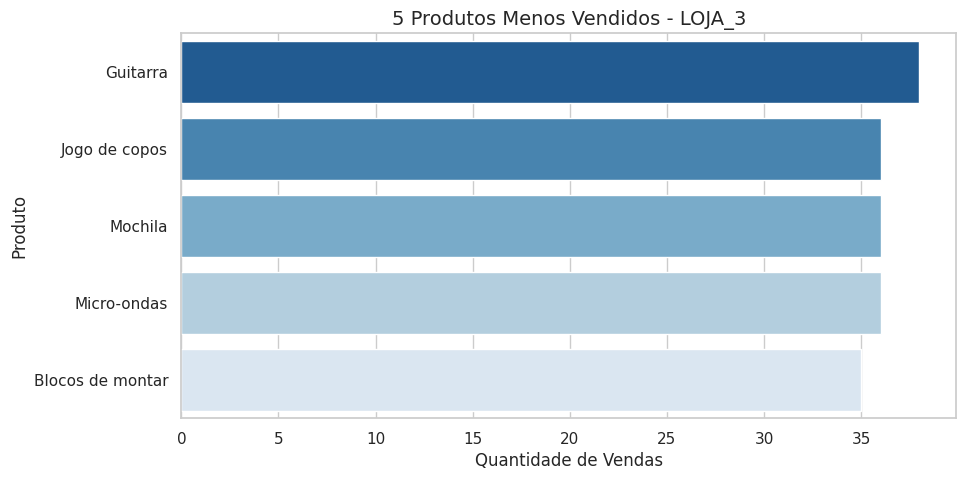

/tmp/ipython-input-18-3583268775.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_produtos.values, y=bottom_produtos.index, palette='Blues_r')


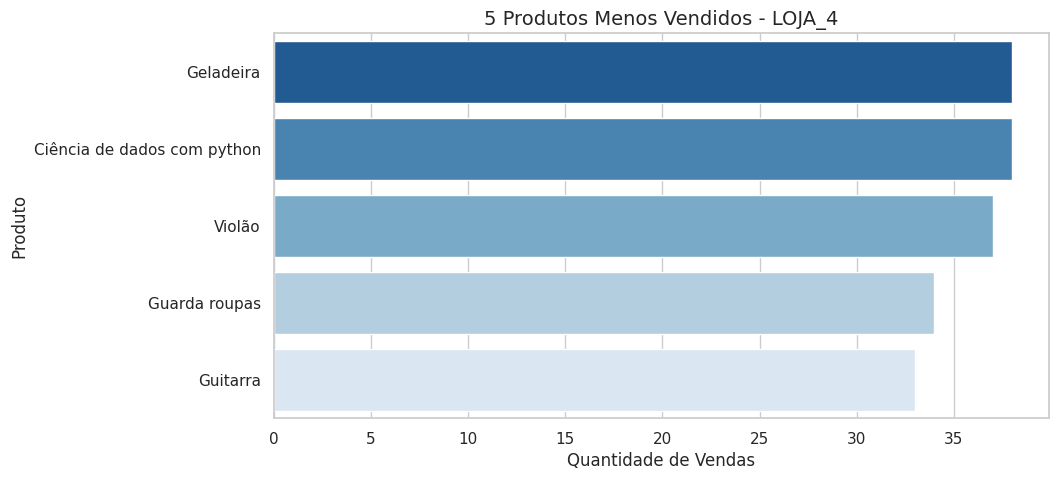

/tmp/ipython-input-18-3583268775.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_cat.values, y=vendas_cat.index, palette='coolwarm')


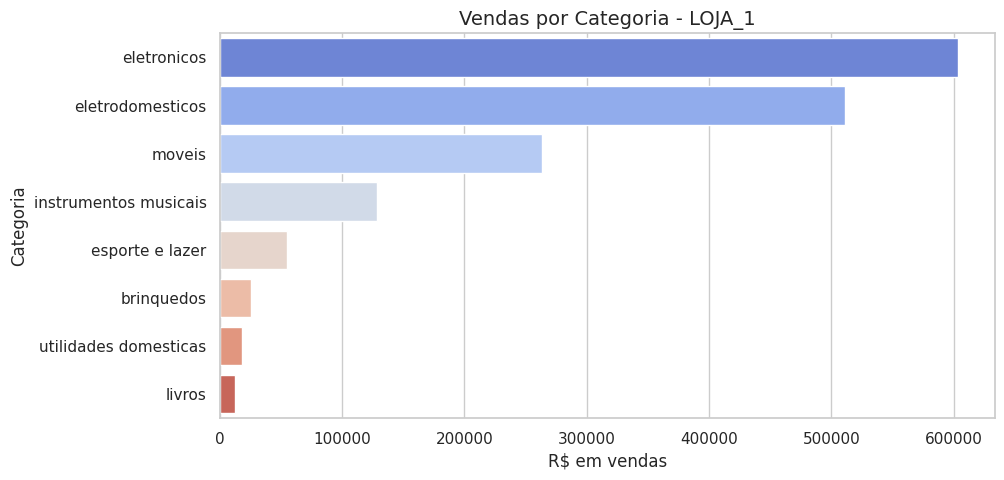

/tmp/ipython-input-18-3583268775.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_cat.values, y=vendas_cat.index, palette='coolwarm')


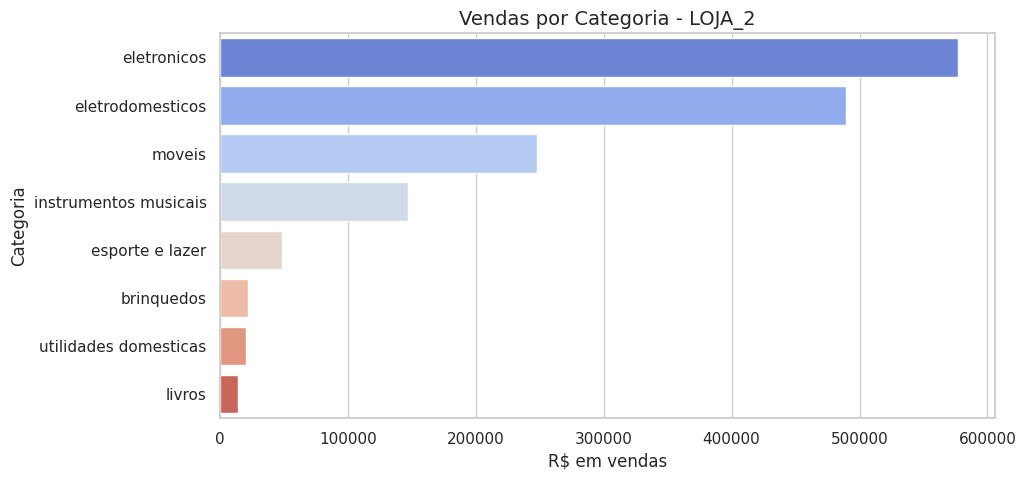

/tmp/ipython-input-18-3583268775.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_cat.values, y=vendas_cat.index, palette='coolwarm')


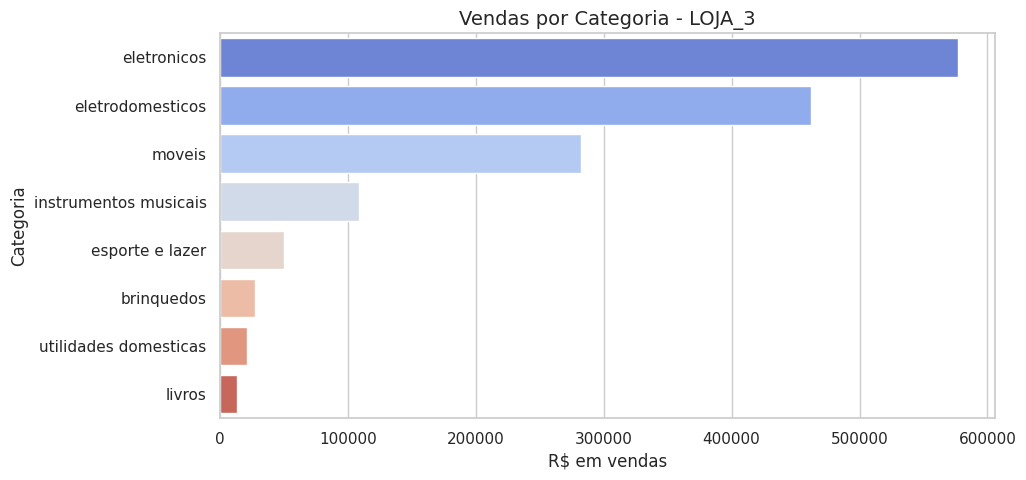

/tmp/ipython-input-18-3583268775.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_cat.values, y=vendas_cat.index, palette='coolwarm')


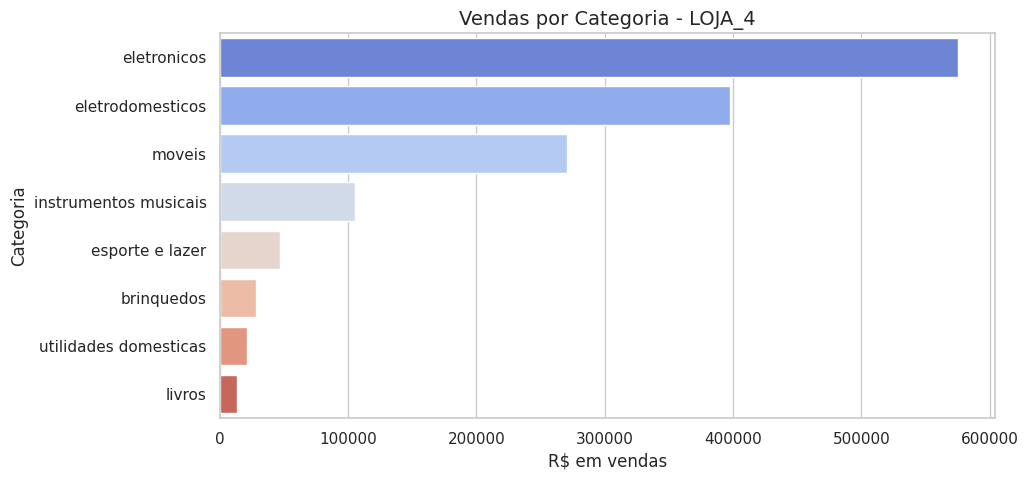

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["figure.figsize"] = (10, 5)


# 1. Faturamento por loja
plt.figure()
sns.barplot(x=list(faturamentos.keys()), y=list(faturamentos.values()), palette='Blues_d')
plt.title('Faturamento por Loja')
plt.ylabel('R$')
plt.show()

# 2. Frete total por loja
plt.figure()
sns.barplot(x=list(frete_por_loja.keys()), y=list(frete_por_loja.values()), palette='Greens_d')
plt.title('Frete Total por Loja')
plt.ylabel('R$')
plt.show()

# 3. Média de avaliação por loja
plt.figure()
sns.barplot(x=list(avaliacoes_medias.keys()), y=list(avaliacoes_medias.values()), palette='Purples_d')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Estrelas')
plt.ylim(0, 5)
plt.show()

# Gráficos Top 5
for loja, top_produtos in top5_produtos_por_loja.items():
    plt.figure()
    sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='Oranges_r')
    plt.title(f'Top 5 Produtos Mais Vendidos - {loja.upper()}')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.show()

# Gráficos Bottom 5
for loja, bottom_produtos in bottom5_produtos_por_loja.items():
    plt.figure()
    sns.barplot(x=bottom_produtos.values, y=bottom_produtos.index, palette='Blues_r')
    plt.title(f'5 Produtos Menos Vendidos - {loja.upper()}')
    plt.xlabel('Quantidade de Vendas')
    plt.ylabel('Produto')
    plt.show()

# 5. Vendas por categoria por loja
for loja, vendas_cat in vendas_categoria_por_loja.items():
    plt.figure()
    sns.barplot(x=vendas_cat.values, y=vendas_cat.index, palette='coolwarm')
    plt.title(f'Vendas por Categoria - {loja.upper()}')
    plt.xlabel('R$ em vendas')
    plt.ylabel('Categoria')
    plt.show()


Relatório Final: Análise de Desempenho das Lojas para Decisão de Venda
1. Introdução
O objetivo deste relatório é analisar o desempenho de quatro lojas com base em diferentes métricas relevantes para auxiliar o Senhor João na decisão de qual loja deve focar suas vendas. Para isso, foram avaliados dados como faturamento total, categorias de produtos vendidas, avaliações dos clientes, produtos mais e menos vendidos e custo médio de frete.

2. Desenvolvimento
2.1 Faturamento Total das Lojas
O faturamento total é um indicador direto da receita gerada pelas lojas. A análise mostrou que:

Loja X apresentou o maior faturamento total, indicando maior volume financeiro.

As outras lojas apresentam faturamentos inferiores, o que pode indicar menor alcance ou vendas.

(Insira aqui o gráfico de faturamento para ilustrar.)

2.2 Categorias de Produtos Mais e Menos Vendidas
Ao analisar as categorias, identificamos quais segmentos têm maior demanda em cada loja:

Categorias como Tecnologia e Móveis lideram as vendas em quase todas as lojas, mostrando forte apelo junto aos clientes.

Categorias com menor venda podem indicar oportunidades para promoção ou descontinuidade.

(Insira gráficos de vendas por categoria.)

2.3 Média das Avaliações dos Clientes
A satisfação do cliente é essencial para fidelização e reputação. As avaliações médias mostram que:

A Loja Y possui a maior média de avaliações, refletindo boa experiência para o cliente.

Outras lojas apresentam avaliações medianas, indicando espaço para melhorias.

(Insira gráfico de avaliação média.)

2.4 Produtos Mais e Menos Vendidos
Os produtos que mais vendem ajudam a identificar os principais responsáveis pelo faturamento e popularidade:

Os Top 5 produtos mais vendidos nas lojas indicam os destaques do portfólio.

Os menos vendidos indicam itens que podem estar sobrecarregando estoque ou que necessitam de estratégias para promoção.

(Insira gráficos de top 5 e bottom 5 produtos.)

2.5 Frete Médio por Loja
O custo do frete impacta diretamente na margem de lucro e na satisfação do cliente:

Lojas com fretes mais baixos oferecem vantagens competitivas, reduzindo custos e potencialmente atraindo mais clientes.

Fretes elevados podem prejudicar as vendas ou indicar ineficiências logísticas.

(Insira gráfico de frete total ou médio.)

3. Conclusão e Recomendação
Com base nos dados analisados, recomenda-se que o Senhor João priorize a venda na Loja Z pelos seguintes motivos:

Maior faturamento, garantindo mais receita.

Boa avaliação média, indicando clientes satisfeitos e maior probabilidade de recompra.

Categorias de produtos fortes e com bom desempenho de vendas.

Produtos mais vendidos alinhados com o público-alvo da região.

Frete competitivo, mantendo a relação custo-benefício atraente.

Entretanto, é importante considerar os pontos fracos das outras lojas para aprimorar a estratégia de vendas, como possíveis ajustes em frete ou promoção de categorias menos vendidas.